1.no feature selction done 
2.no outlier  treatment


In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)


In [7]:
df=pd.read_clipboard()

E:\programs\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
imp=['ownfax', 'ownvcr', 'active', 'voice', 'internet', 'owntv', 'tollmon', 'equipten', 'card2spent', 'equip', 'tollfree', 'cardmon', 'wireten', 'ebill', 'cardtenurecat', 'equipmon', 'wireless', 'card2benefit', 'pager', 'response_03', 'response_01', 'card2tenurecat', 'ownpc', 'owngame', 'card2type', 'card2fee', 'wiremon', 'tollten', 'cardspent', 'owncd', 'churn', 'callcard', 'multline', 'forward', 'owndvd', 'response_02', 'tenure', 'cardten', 'ownpda', 'ownipod', 'card2', 'news']

In [10]:
ndf=df.loc[:,imp]

In [11]:
a=['address', 'age', 'bfast', 'birthmonth', 'callid', 'callwait', 'card2tenure', 'cardtenure', 'cartype', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer','custid', 'ed', 'employ', 'hourstv', 'lncardmon', 'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten', 'longmon', 'longten', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish', 'pets_small', 'spoused']

In [12]:
a=set(a)

In [13]:
b=set(df.columns)

In [14]:
ndf=df.loc[:,b-a]

In [15]:
ndf['total_spend']=ndf['cardspent']+ndf['card2spent']

In [16]:
del ndf['card2spent']

In [17]:
del ndf['cardspent']

In [18]:
import seaborn as sns
import  matplotlib

In [19]:
ndf.describe()

,equipmon,response_03,pager,debtinc,churn,owngame,cardmon,carbought,default,card2,...,news,owntv,ebill,empcat,tollfree,cardfee,carown,response_01,polparty,total_spend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,12.991310,0.102600,0.243600,9.954160,0.253200,0.474800,15.443850,0.221000,0.23420,2.774400,...,0.472600,0.983000,0.348600,2.9326,0.475600,0.189800,0.641400,0.083600,0.381400,498.07863
std,19.212943,0.303466,0.429297,6.399783,0.434888,0.499415,15.007569,0.609125,0.42354,1.173448,...,0.499299,0.129284,0.476575,1.4533,0.499454,0.392182,0.654898,0.276815,0.485779,351.52927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,-1.000000,0.000000,0.000000,8.11000
25%,0.000000,0.000000,0.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,...,0.000000,1.000000,0.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,276.28250
50%,0.000000,0.000000,0.000000,8.800000,0.000000,0.000000,13.750000,0.000000,0.00000,3.000000,...,0.000000,1.000000,0.000000,3.0000,0.000000,0.000000,1.000000,0.000000,0.000000,414.25000
75%,30.800000,0.000000,0.000000,13.600000,1.000000,1.000000,22.750000,1.000000,0.00000,4.000000,...,1.000000,1.000000,1.000000,4.0000,1.000000,0.000000,1.000000,0.000000,1.000000,615.56250
max,106.300000,1.000000,1.000000,43.100000,1.000000,1.000000,188.500000,1.000000,1.00000,5.000000,...,1.000000,1.000000,1.000000,5.0000,1.000000,1.000000,1.000000,1.000000,1.000000,4881.05000


In [20]:
ndf=ndf.replace('#NULL!',np.NaN)

In [21]:
ndf.townsize=ndf.townsize.astype('float')

In [22]:
ndf.dtypes.value_counts()

float64    80
object      1
dtype: int64

In [23]:
ndf.townsize.dtype

dtype('float64')

In [24]:
 del ndf['cardten']

In [25]:
ndf.card2fee.nunique(dropna=True)

2

In [26]:
df['pager']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: pager, Length: 5000, dtype: float64

In [27]:
c=list(ndf.columns)

In [28]:
a=[]
b=[]
for e in c:
    if ndf[e].nunique(dropna=True)>5:
        a.append(e)
    else:
        b.append(e)
        

In [29]:
df_dis=ndf.loc[:,a]

In [30]:
df_con=ndf.loc[:,b]

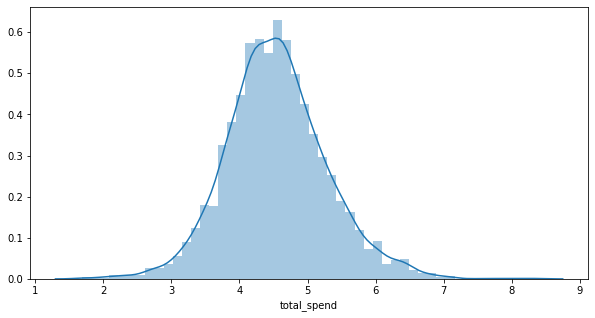

In [31]:
sns.distplot(np.sqrt(np.sqrt(df_dis.total_spend)))

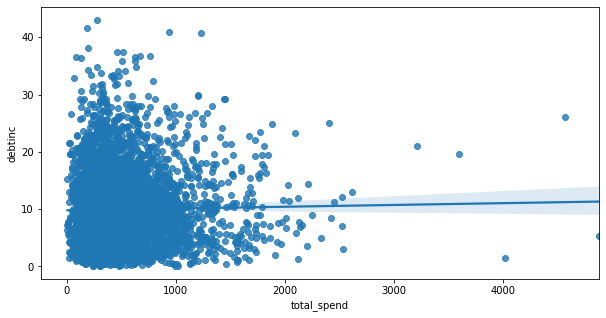

In [32]:
sns.regplot(x='total_spend',y='debtinc',data=df_dis)

In [33]:
df_con

,response_03,pager,churn,owngame,carbought,default,card2,marital,telecommute,carbuy,...,owndvd,news,owntv,ebill,empcat,tollfree,cardfee,carown,response_01,polparty
0,0.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0


In [34]:
ndf.equipten.value_counts()[0]/ndf.shape[0]*100
    

65.92

In [35]:
ndf.tollten.value_counts()[0]/ndf.shape[0]*100

52.44

In [36]:
#more than 70 % values in wireten are null so it is wise to drop columns
ndf=ndf.drop(['equipten','tollten'],axis='columns')

In [37]:
df_dis=df_dis.drop(['wireten','equipten','tollten'],axis='columns')

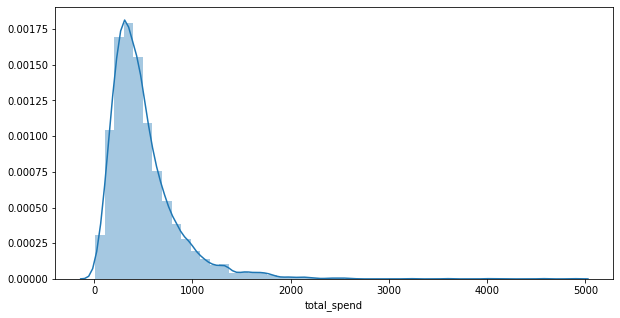

In [38]:
sns.distplot(df_dis.total_spend)

In [39]:
df_dis.total_spend.describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: total_spend, dtype: float64

In [40]:
ndf['trans_spend']=np.sqrt(np.sqrt(ndf.total_spend))

In [41]:
del ndf['total_spend']

In [42]:
equ='trans_spend~card2fee+card2benefit+internet+owndvd+wireless+tollfree+active+ownipod+pager+ownpda+tenure+churn+multline+voice+owngame+ownpc+wiremon+callcard+equipmon+equip+forward+card2+ownvcr+owncd+card2type+response_03+tollmon+ebill+news+response_02+ownfax+cardmon+cardtenurecat+owntv+response_01+card2tenurecat'

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x,y=train_test_split(ndf,test_size=0.3,random_state=1234)

In [45]:
ndf=ndf.fillna(0)

In [46]:
x=ndf[ndf.columns.difference(['trans_spend'])]
y=ndf['trans_spend']

In [47]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

## model with whole data set

In [64]:
na='trans_spend~internet+owndvd+voice+card2+ownvcr+owncd+response_03+tollmon'

In [48]:
import statsmodels.formula.api as smf
model = smf.ols(equ, data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.421
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.82e-42
Time:                        16:45:10   Log-Likelihood:                -5458.1
No. Observations:                5000   AIC:                         1.099e+04
Df Residuals:                    4963   BIC:                         1.123e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9879      0.100     39.

### feature engineeering

### filter methods 

In [49]:
from sklearn.linear_model import Lasso, LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
selection = SelectFromModel(LinearRegression(fit_intercept=True))
selection.fit(x_train, x_test)

# see the selected features.
selected_features = x_train.columns[(selection.get_support())]

# see the deleted features.
removed_features = x_train.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]

In [50]:
?LinearRegression

In [51]:
x_test.shape

(3350,)

In [52]:
removed_features

Index([], dtype='object')

In [53]:
print(selected_features)

Index(['agecat', 'card', 'card2', 'carown', 'ebill', 'equip', 'gender',
       'inccat', 'internet', 'owncd', 'owndvd', 'ownfax', 'owntv', 'ownvcr',
       'pager', 'response_03', 'retire', 'union', 'voice', 'wireless'],
      dtype='object')


In [54]:
fe1='trans_spend~card+card2+gender+inccat+internet+owndvd+response_03+retire+voice+creddebt'

In [75]:
m='trans_spend~card+card2+gender+inccat+internet+response_03+retire+voice+creddebt+internet+owndvd+voice+card2'

In [55]:
import statsmodels.formula.api as smf
model = smf.ols(fe1, data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sun, 31 May 2020   Prob (F-statistic):          8.18e-309
Time:                        16:45:12   Log-Likelihood:                -4872.7
No. Observations:                5000   AIC:                             9767.
Df Residuals:                    4989   BIC:                             9839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8128      0.054     89.687      

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
for i in df.columns:
    df[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [70]:
m

'trans_spend~card+card2+gender+inccat+internet+owndvd+response_03+retire+voice+creddebtinternet+owndvd+voice+card2+ownvcr+owncd+response_03+tollmon'

In [76]:

model = smf.ols(m, data=ndf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_spend   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sun, 31 May 2020   Prob (F-statistic):          8.18e-309
Time:                        17:20:26   Log-Likelihood:                -4872.7
No. Observations:                5000   AIC:                             9767.
Df Residuals:                    4989   BIC:                             9839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8128      0.054     89.687      